# Мироненко А.
# Датасет GEOD-74737
# DESeq2

Чтение данных и составление матрицы дизайна:

In [1]:
samples <- read.table('GSE74737_BreenMS_raw_and_normalized_counts - Raw Count Matrix.txt', 
                      header=TRUE,
                      skip=2,
                      sep=',')

sample_names = colnames(samples)[-1]
design = matrix(nrow=length(sample_names), ncol=2)


for (i in 1:11){
  design[i, 1] <- '0'
  design[i, 2] <- '0'
}


for (i in 11:21){
  design[i, 1] <- '0'
  design[i, 2] <- '1'
}

for (i in 21:30){
  design[i, 1] <- '1'
  design[i, 2] <- '1'
}

colnames(design) <- c('psychosis', 'addiction')
rownames(design) <- sample_names
design

psychosis addiction
CONTROL_1  0         0        
CONTROL_2  0         0        
CONTROL_3  0         0        
CONTROL_4  0         0        
CONTROL_5  0         0        
CONTROL_6  0         0        
CONTROL_7  0         0        
CONTROL_8  0         0        
CONTROL_9  0         0        
CONTROL_10 0         0        
MA_1       0         1        
MA_2       0         1        
MA_3       0         1        
MA_4       0         1        
MA_5       0         1        
MA_6       0         1        
MA_7       0         1        
MA_8       0         1        
MA_9       0         1        
MA_10      0         1        
MAP_1      1         1        
MAP_2      1         1        
MAP_3      1         1        
MAP_4      1         1        
MAP_5      1         1        
MAP_6      1         1        
MAP_7      1         1        
MAP_8      1         1        
MAP_9      1         1        
MAP_10     1         1

In [2]:
samples

Gene        CONTROL_1 CONTROL_2 CONTROL_3 CONTROL_4 CONTROL_5 CONTROL_6
1     1-мар.       1783     1117       2721     1466      1522       1218    
2     2-мар.       1337      585       2773      526       466       1729    
3     3-мар.        204      126        106       69        37         85    
4     4-мар.          0        0          1        1         1          1    
5     5-мар.        404      279        655      373       363        266    
6     6-мар.       3029     1583       3780     1926      1612       1449    
7     7-мар.       3938     3226       6846     4323      3609       2701    
8     8-мар.      15716     6557      14827     3121      2059      11586    
9     9-мар.        215       68        199      100        71         81    
10    10-мар.         5        3          0        0         1          0    
11    11-мар.         0        0          0        0         0          0    
12    1-сент.      1015      358        983      580       385        377    
13    2-сент.      3607     1899       5378     2598      2281       1652    
14    3-сент.         1        1          4        1         3          1    
15    4-сент.        20       19         40       18        11         18    
16    5-сент.         0        1          0        0         0          0    
17    6-сент.      3852     1492       3852     2396      1594       1543    
18    7-сент.      4047     2409       6702     3550      3004       2258    
19    8-сент.       116       57        193      104        75         61    
20    9-сент.      6332     2609       8793     4282      3186       2839    
21    10-сент.       40       31         60       39        40         21    
22    11-сент.      771      555       1288      623       397        343    
23    12-сент.        1        0          0        0         0          0    
24    14-сент.       16       12         45       15        14          4    
25    15-сент.     1626      919       2051     1374      1046       1100    
26    1-дек.          0        0          0        1         0          1    
27    1/2-SBSRNA4    29        9         19       23        15         19    
28    A1BG           22        5         19       11         4          5    
29    A1BG-AS1       95       29        120       78        45         49    
30    A1CF            0        0          0        0         0          0    
⋮     ⋮           ⋮         ⋮         ⋮         ⋮         ⋮         ⋮        
23316 ZSCAN18      325       142       259       197       135       130     
23317 ZSCAN2       197        83       231       127       100        85     
23318 ZSCAN20      101        35       132        63        51        39     
23319 ZSCAN21      124        62       166        71        56        60     
23320 ZSCAN22      170        83       233       107        87        74     
23321 ZSCAN23       30        38        55        12        16        19     
23322 ZSCAN29      873       572      1227       767       485       354     
23323 ZSCAN30      340       129       275       220       147       144     
23324 ZSCAN4         1         2         3         0         0         0     
23325 ZSCAN5A       29        16        43        12        11         8     
23326 ZSCAN5B        0         0         1         0         0         0     
23327 ZSWIM1       152        76       181       120        79        96     
23328 ZSWIM2         0         0         0         0         0         0     
23329 ZSWIM3       124        81       237       111        90        78     
23330 ZSWIM4        38        28        63        30        16        16     
23331 ZSWIM5        75        19        86        56        36        17     
23332 ZSWIM6       917       720      1550       889       801       499     
23333 ZSWIM7       173        89       183       103       101        74     
23334 ZUFSP        309       152       354       222       152       133     
23335 ZW10         364      

Как видно, названия первых генов считались некорректно (для других форматов ситуация аналогична), поэтому их нет смысла рассматривать.

In [3]:
samples_clean <- samples[27:nrow(samples),]

In [4]:
library(DESeq2)

Loading required package: S4Vectors
Loading required package: stats4
Loading required package: BiocGenerics
Loading required package: parallel

Attaching package: ‘BiocGenerics’

The following objects are masked from ‘package:parallel’:

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, parCapply, parLapply,
    parLapplyLB, parRapply, parSapply, parSapplyLB

The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs

The following objects are masked from ‘package:base’:

    anyDuplicated, append, as.data.frame, basename, cbind, colnames,
    dirname, do.call, duplicated, eval, evalq, Filter, Find, get, grep,
    grepl, intersect, is.unsorted, lapply, Map, mapply, match, mget,
    order, paste, pmax, pmax.int, pmin, pmin.int, Position, rank,
    rbind, Reduce, rownames, sapply, setdiff, sort, table, tapply,
    union, unique, unsplit, which, which.max, which.min


Attaching package: ‘S4Vectors’

The followin

In [61]:
run_deseq <- function(samples, design) {
    dds <- DESeqDataSetFromMatrix(countData = samples[, -1],
                              colData = design,
                              design = ~psychosis + addiction)
    
    dds$psychosis <- relevel(as.factor(design$psychosis), ref='0')
    p_val <- 0.1
    
    #leave out hardly expressed genes
    keep <- rowSums(counts(dds)) >= 10
    dds <- dds[keep,]


    dds_fit <- DESeq(dds)
    plotMA(dds_fit, ylim=c(-2,2))
    res <- results(dds_fit)
    summary(res)
    res$gene = samples[keep,1]
    
    return(res)
}

estimating size factors
estimating dispersions
gene-wise dispersion estimates
mean-dispersion relationship
final dispersion estimates
fitting model and testing
-- replacing outliers and refitting for 47 genes
-- DESeq argument 'minReplicatesForReplace' = 7 
-- original counts are preserved in counts(dds)
estimating dispersions
fitting model and testing



out of 17802 with nonzero total read count
adjusted p-value < 0.1
LFC > 0 (up)       : 19, 0.11%
LFC < 0 (down)     : 10, 0.056%
outliers [1]       : 0, 0%
low counts [2]     : 4832, 27%
(mean count < 13)
[1] see 'cooksCutoff' argument of ?results
[2] see 'independentFiltering' argument of ?results



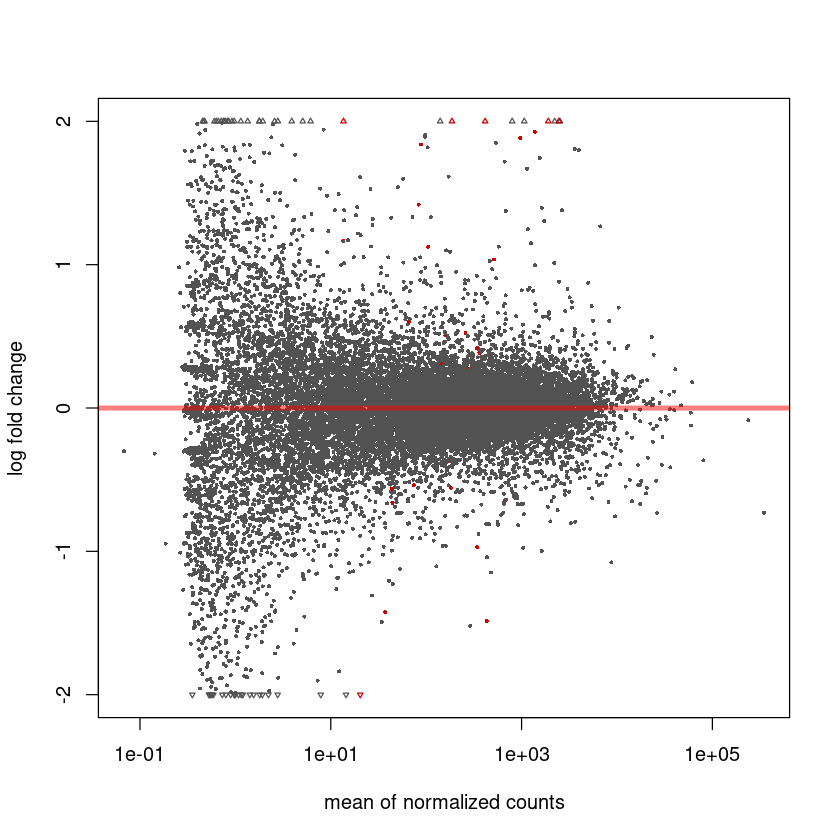

In [62]:
results <- run_deseq(samples_clean, data.frame(design))
control_vs_ma <- results[which(results$padj < 0.1),, drop=FALSE]

In [63]:
control_vs_ma$gene

[1] ADAM15       ALS2CR12     ANKRD36BP2   BAK1         BATF2       
 [6] C17orf76-AS1 CLN3         CTSL1        DDRGK1       EPSTI1      
[11] FAT1         FBP1         GBP1P1       IFI44L       ISG15       
[16] KBTBD6       LINC00482    MAGEE1       MAOA         MFSD7       
[21] OAS1         PHLDB2       RFESD        RSAD2        SIGLEC1     
[26] TBC1D2       TCN2         ZBP1         ZNF286B     
23345 Levels: 1-дек. 1-мар. 1-сент. 1/2-SBSRNA4 10-мар. 10-сент. ... ZZZ3

In [1]:
library(RDAVIDWebService)

Loading required package: graph
Loading required package: BiocGenerics
Loading required package: parallel

Attaching package: ‘BiocGenerics’

The following objects are masked from ‘package:parallel’:

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, parCapply, parLapply,
    parLapplyLB, parRapply, parSapply, parSapplyLB

The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs

The following objects are masked from ‘package:base’:

    anyDuplicated, append, as.data.frame, basename, cbind, colnames,
    dirname, do.call, duplicated, eval, evalq, Filter, Find, get, grep,
    grepl, intersect, is.unsorted, lapply, Map, mapply, match, mget,
    order, paste, pmax, pmax.int, pmin, pmin.int, Position, rank,
    rbind, Reduce, rownames, sapply, setdiff, sort, table, tapply,
    union, unique, unsplit, which, which.max, which.min

Loading required package: GOstats
Loading required package: Biobase
Welcome to Bio

Загрузка результатов аннотировония сервисом DAVID.

In [89]:
#DAVIDFunctionalAnnotationChart(control_vs_ma$gene)
david_results <-DAVIDFunctionalAnnotationTable("david_results.txt")
david_results

DAVID Result object
Result type:  Functional Annotation Table 
Genes: 25  with (unique: 25 , duplicate: 0 )
Available categories:  BIOCARTA, COG_ONTOLOGY, GAD_DISEASE, GAD_DISEASE_CLASS, GOTERM_BP_DIRECT, GOTERM_CC_DIRECT, GOTERM_MF_DIRECT, INTERPRO, KEGG_PATHWAY, OMIM_DISEASE, PIR_SUPERFAMILY, SMART, UP_KEYWORDS, UP_SEQ_FEATURE, UP_TISSUE 

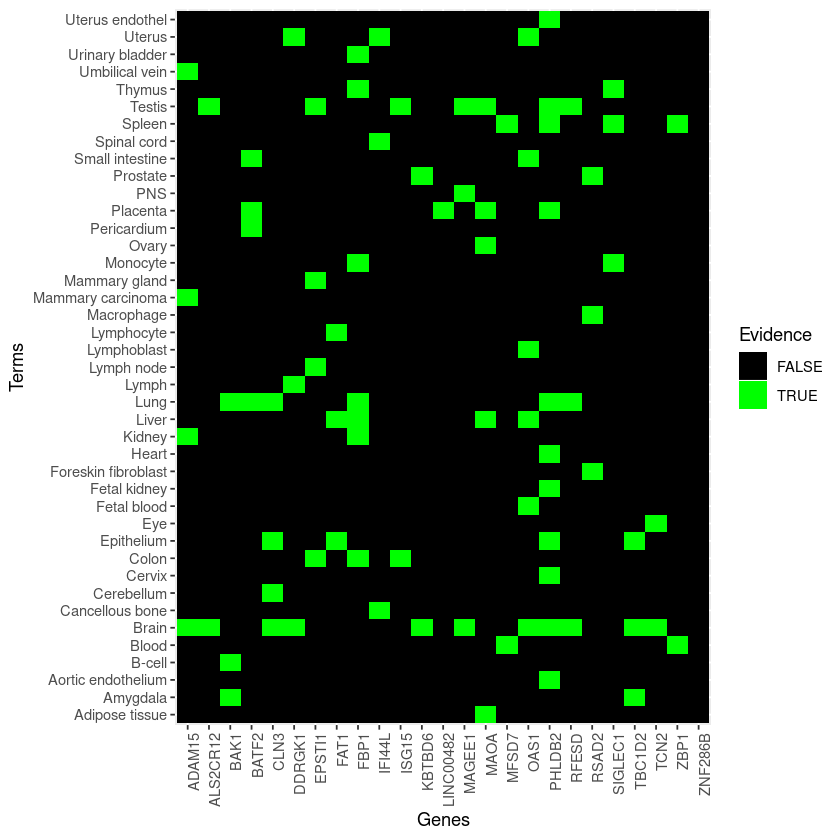

In [91]:
plot2D(david_results, category='UP_TISSUE')

Информация о том, с какими заболеваниями ассоциированы рассматриваемые гены

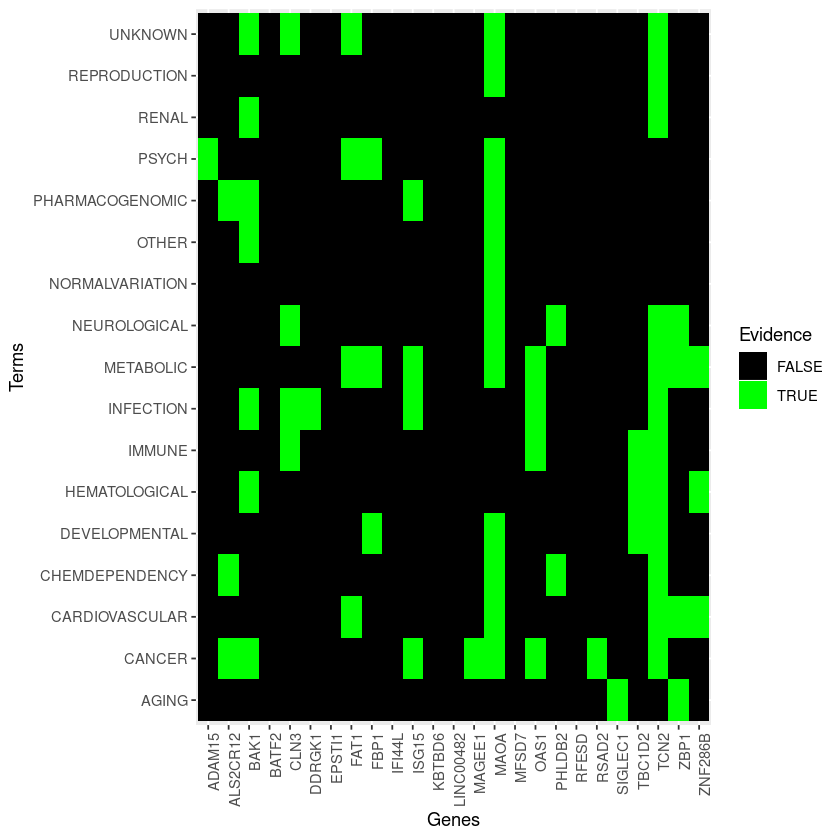

In [92]:
plot2D(david_results, category='GAD_DISEASE_CLASS')

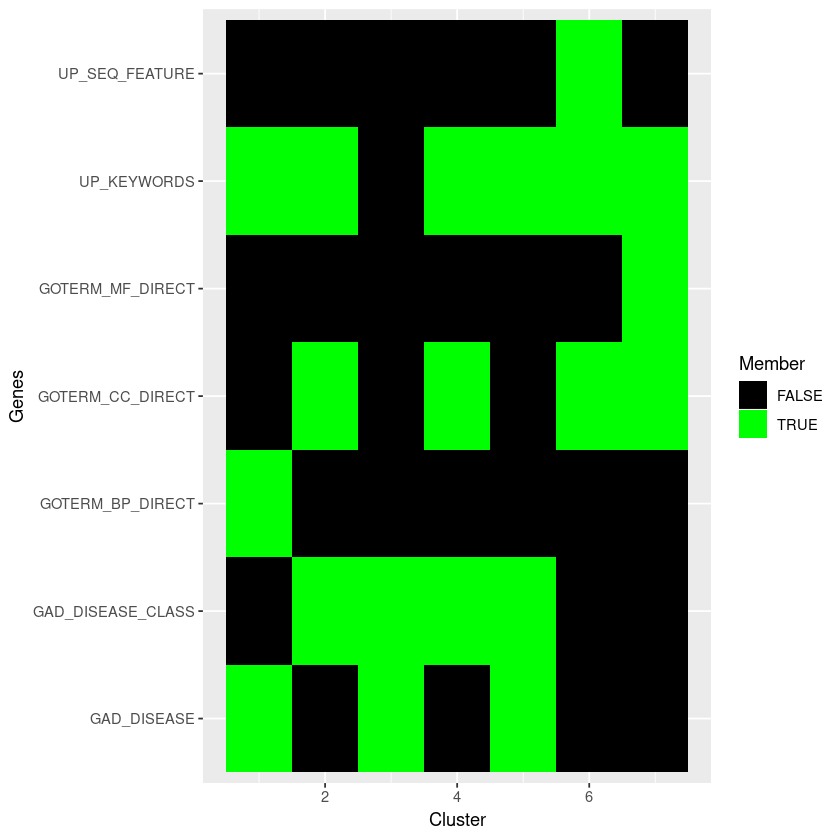

In [93]:
david_results <-DAVIDGeneCluster("david_cluster.txt")
plot2D(david_results)

In [65]:
library(dplyr)
library(tibble)

gene_stats <- data.frame(results) %>%
  dplyr::select(gene, stat) %>% 
  na.omit() %>% 
  distinct() %>% 
  group_by(gene)
ranks <- deframe(gene_stats)

In [66]:
library(fgsea)

In [58]:
pathways.schiz <- gmtPathways("geneset_1.gmt")
pathways.nicotine <- gmtPathways("gene_nicotine.gmt")
pathways.apoptosis <- gmtPathways("apoptosis.gmt")
pathways.dopamine <- gmtPathways("dopamine.gmt")

Warning message in readLines(gmt.file):
“incomplete final line found on 'geneset_1.gmt'”Warning message in readLines(gmt.file):
“incomplete final line found on 'gene_nicotine.gmt'”Warning message in readLines(gmt.file):
“incomplete final line found on 'apoptosis.gmt'”Warning message in readLines(gmt.file):
“incomplete final line found on 'dopamine.gmt'”

In [64]:
fgseaRes <- fgsea(pathways=pathways.schiz, stats=ranks, nperm=1000)
sum(fgseaRes[, padj < 0.1])

[1] 1